[ 232.54614 2000.     ]
[ 232.54614 2000.     ]


ValueError: evaluation requested for wavelength 10.0 nm, but valid range is 232.54614 nm < wavelength < 2000.0 nm

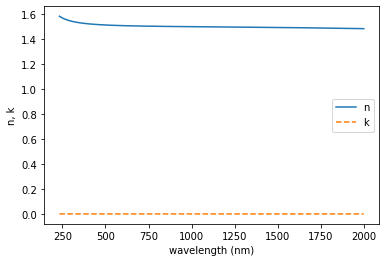

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d, splrep, splev

from refractive_index_database.material_database import MaterialDatabase
from refractive_index_database.material_data import MaterialData
#from refractive_index_database import get_permittivity
from refractive_index_database.config import get_config
from refractive_index_database.spectrum import Spectrum
from refractive_index_database.jcm_interface import get_permittivity
from refractive_index_database.spectral_data import Interpolation, Extrapolation, Sellmeier

mdb = MaterialDatabase()
aSi = mdb.get_material("corning_eagle")
mat = aSi
extended_spectrum = Spectrum(2000.0,unit='nanometer')
mat.extrapolate(extended_spectrum,spline_order=1)
spectrum = Spectrum(10.0,unit='nanometer')
mat._plot_data('nk')
print(mat.get_nk_data(spectrum))

In [16]:
Ag = mdb.get_material('Silver')
print(Ag.data['real'].valid_range.values)
Ag.extrapolate((300,2000))
print(Ag.data['real'].valid_range.values)

[0.1879 1.937 ]
[ 300 2000]


In [9]:
mdb.view_interactive()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
mdb.save_interactive()
mdb.save_to_file()

In [28]:
aSi = mdb.get_material("amorphous_silicon")

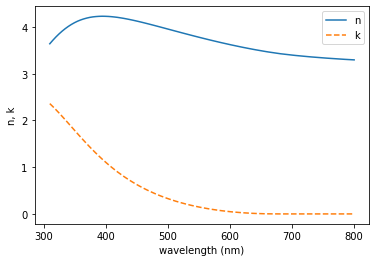

In [29]:
aSi._plot_data('nk',values=np.linspace(310,800,100))

In [10]:
#wavelength = np.linspace(400,1000) # nm
#spec = Spectrum(wavelength,unit='nanometer')

ang_freq = spec.convert_to('angularfrequency','1/s')
config = get_config()
inputs = {'path':config['Path'],
         'name':'Silver',
         'EMOmega':ang_freq}
eps = get_permittivity(inputs)
print(eps)

(-9.799934621455998, 0.3130884)


3


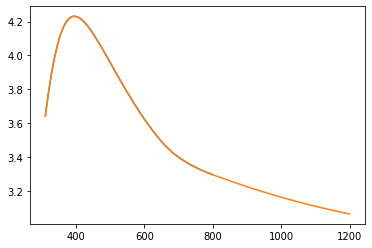

In [38]:
mat = aSi
mat.data['imag']
values = np.linspace(310,800,100)
spectrum = Spectrum(values,'wavelength','nanometer')
n_values = mat.data['real'].evaluate(spectrum)
plt.plot(values,n_values)
spline = splrep(values,n_values,k=2)
print(len(spline))
extended_values = np.linspace(310,1200,100)
recreatate = splev(extended_values,spline)
plt.plot(extended_values,recreatate)
#extrap = Extrapolation(Ag.data['real'],[0.1879,2.0],spectrum_type='wavelength',unit='micrometer')


In [24]:
tup = (None,30)
print(tup[1])
print(tup[0])
print(tup[0]==None)

30
None
True
